In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
from core.analysis import load_episode_data
# from utils.hierarchical_sparse_compressor import HierarchicalSparseCompressor
from configs.ssc import all_configs
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os
import pandas as pd
import collections
import seaborn as sns

In [5]:
def add_summary_to_df(df, directory, model_name, granularity=10):
    for d in os.listdir(directory):
        if d != '.ipynb_checkpoints':
            data = pd.read_pickle(directory+d+'/summary.p')[::granularity]
            data['model'] = [model_name] * len(data)
            df = df.append(data, ignore_index=True)    
    return df

In [31]:
# def smooth_data(data):
#     new_steps = []
#     new_reward = []
#     min_steps = data.steps.min()
#     max_steps = data.steps.max()
#     intervals = list(range(0,max_steps%1000, 1000))
#     for i, row in data.iterrows():
#         if row.

In [103]:
minigrid_0_01 = dict(
    ppo_scratch = '../experiments/baselines/minigrid/ppo/scratch/0-1/',
    ppo_transfer = '../experiments/baselines/minigrid/ppo/transfer/0-1/',
    ppoc_scratch = '../experiments/baselines/minigrid/ppoc/scratch/0-1/',
    ppoc_transfer = '../experiments/baselines/minigrid/ppoc/transfer/0-1/',
    ssc = '../experiments/minigrid_no_eps/lr5e-4/')

In [108]:
minigrid_0_01 = dict(
    ppo_scratch = '../experiments/minigrid_round5_complete/ppo/scratch/0-1/',
    ppo_transfer = '../experiments/minigrid_round5_complete/ppo/transfer/0-1/',
    ppoc_scratch = '../experiments/minigrid_round5_complete/ppoc/scratch/0-1/',
    ppoc_transfer = '../experiments/minigrid_round5_complete/ppoc/transfer/0-1/',
    ssc = '../experiments/minigrid_no_eps/lr5e-4/')

In [6]:
minigrid_01_02 = dict(
    ppo_scratch = '../experiments/minigrid_round5_complete/ppo/scratch/0-2/',
    ppo_transfer = '../experiments/minigrid_round5_complete/ppo/transfer/0-2/',
    ppoc_scratch = '../experiments/minigrid_round5_complete/ppoc/scratch/0-2/',
    ppoc_transfer = '../experiments/minigrid_round5_complete/ppoc/transfer/0-2/')
#     ssc = '../experiments/minigrid_no_eps/lr5e-4/')

In [88]:
hanoi_2_3 = dict(
    ppo_scratch = '../experiments/baselines/hanoi/ppo/scratch/3/',
    ppo_transfer = '../experiments/baselines/hanoi/ppo/transfer/2-3/',
    ppoc_scratch = '../experiments/baselines/hanoi/ppoc/scratch/3/',
    ppoc_transfer = '../experiments/baselines/hanoi/ppoc/transfer/2-3/',
    ssc = '../experiments/hanoi_w_eps/')

In [37]:
hanoi_3_4 = dict(
    ppo_scratch = '../experiments/baselines/hanoi/ppo/scratch/4/',
    ppo_transfer = '../experiments/baselines/hanoi/ppo/transfer/3-4/',
    ppoc_scratch = '../experiments/baselines/hanoi/ppoc/scratch/4/',
    ppoc_transfer = '../experiments/baselines/hanoi/ppoc/transfer/3-4/')

In [38]:
hanoi_df = pd.DataFrame()
for k,v in hanoi_3_4.items():
    hanoi_df = add_summary_to_df(hanoi_df, v, k)

In [39]:
hanoi_sub_dirs = [
    'hl_cost_-1_hl_cost_-1_w_eps_ssc_hanoi_2disks_seed4_2-to-3_from-ep4000_seed1_lr0.0001_lrgamma_0.95_3-to-4_from-ep4000_seed5_lr0.0001_lrgamma_0.95',
    'hl_cost_-1_hl_cost_-1_w_eps_ssc_hanoi_2disks_seed4_2-to-3_from-ep4000_seed1_lr0.0001_lrgamma_0.95_3-to-4_from-ep4000_seed3_lr0.0001_lrgamma_0.95',
    'hl_cost_-1_hl_cost_-1_w_eps_ssc_hanoi_2disks_seed4_2-to-3_from-ep4000_seed1_lr0.0001_lrgamma_0.95_3-to-4_from-ep4000_seed2_lr0.0001_lrgamma_0.95',
    'hl_cost_-1_hl_cost_-1_w_eps_ssc_hanoi_2disks_seed4_2-to-3_from-ep4000_seed1_lr0.0001_lrgamma_0.95_3-to-4_from-ep4000_seed1_lr0.0001_lrgamma_0.95'
]

In [109]:
minigrid_df = pd.DataFrame()
for k,v in minigrid_0_01.items():
    minigrid_df = add_summary_to_df(minigrid_df, v, k)

In [47]:
hanoi_df = pd.DataFrame()
for k,v in hanoi_3_4.items():
    hanoi_df = add_summary_to_df(hanoi_df, v, k)

In [48]:
hanoi_df = add_summary_to_df_by_files(hanoi_df, '../experiments/', hanoi_sub_dirs, 'ssc', 100)

In [49]:
hanoi_df

,moves,return,steps,model
0,660.000000,-559.000000,1000.0,ppo_scratch
1,681.159768,-580.159768,11000.0,ppo_scratch
2,694.535586,-593.535586,21000.0,ppo_scratch
3,695.126919,-594.126919,31000.0,ppo_scratch
4,712.687184,-611.687184,41000.0,ppo_scratch
...,...,...,...,...
4980,25.007952,75.992048,1960100.0,ssc
4981,25.066547,75.933453,1970100.0,ssc
4982,25.086498,75.913502,1980100.0,ssc
4983,25.056850,75.943150,1990100.0,ssc


In [ ]:
'../experiments/'

In [81]:
minigrid_df2 = pd.DataFrame()
for k,v in minigrid_0_01.items():
    minigrid_df2 = add_summary_to_df(minigrid_df2, v, k)

In [31]:
minigrid_df02 = pd.DataFrame()
for k,v in minigrid_01_02.items():
    minigrid_df02 = add_summary_to_df(minigrid_df02, v, k)

In [30]:
def add_summary_to_df_by_files(df, main_dir, sub_dirs, model_name, granularity=10000):
    for d in sub_dirs:
        data = pd.read_pickle(main_dir+d+'/summary.p')[::granularity]
        data['model'] = [model_name] * len(data)
        df = df.append(data, ignore_index=True)    
    return df

In [10]:
sub_dirs = [
    'hl_cost_-1_hl_cost_-1_ssc_lightbot_minigrid_fractal_cross_0_seed1_fractal_cross_0-to-fractal_cross_0-1_from-ep4000_1000000_seed5_lr0.0005_lrgamma_0.9_fractal_cross_0-1-to-fractal_cross_0-2_from-ep4000_1000000_seed4_lr0.0001_lrgamma_0.99',
    'hl_cost_-1_hl_cost_-1_ssc_lightbot_minigrid_fractal_cross_0_seed1_fractal_cross_0-to-fractal_cross_0-1_from-ep4000_1000000_seed5_lr0.0005_lrgamma_0.9_fractal_cross_0-1-to-fractal_cross_0-2_from-ep4000_1000000_seed3_lr0.0001_lrgamma_0.99',
    'hl_cost_-1_hl_cost_-1_ssc_lightbot_minigrid_fractal_cross_0_seed1_fractal_cross_0-to-fractal_cross_0-1_from-ep4000_1000000_seed5_lr0.0005_lrgamma_0.9_fractal_cross_0-1-to-fractal_cross_0-2_from-ep4000_1000000_seed2_lr0.0001_lrgamma_0.99',
    'hl_cost_-1_hl_cost_-1_ssc_lightbot_minigrid_fractal_cross_0_seed1_fractal_cross_0-to-fractal_cross_0-1_from-ep4000_1000000_seed5_lr0.0005_lrgamma_0.9_fractal_cross_0-1-to-fractal_cross_0-2_from-ep4000_1000000_seed0_lr0.0001_lrgamma_0.99'
]

In [32]:
minigrid_df02 = add_summary_to_df_by_files(minigrid_df02, '../experiments/', sub_dirs, 'ssc', 10)

In [33]:
len(minigrid_df02)

3206

In [34]:
minigrid_df02[minigrid_df02.model !='ssc'].steps

0          1000.0
1         11000.0
2         21000.0
3         31000.0
4         41000.0
          ...    
2475    2411000.0
2476    2421000.0
2477    2431000.0
2478    2441000.0
2479    2451000.0
Name: steps, Length: 2480, dtype: float64

In [35]:
minigrid_df02[minigrid_df02.model=='ssc'].steps

2480          2.0
2481      10002.0
2482      20002.0
2483      30002.0
2484      40002.0
          ...    
3201    1460002.0
3202    1470002.0
3203    1480002.0
3204    1490002.0
3205    1500002.0
Name: steps, Length: 726, dtype: float64

/home/ec2-user/anaconda3/envs/deeprl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


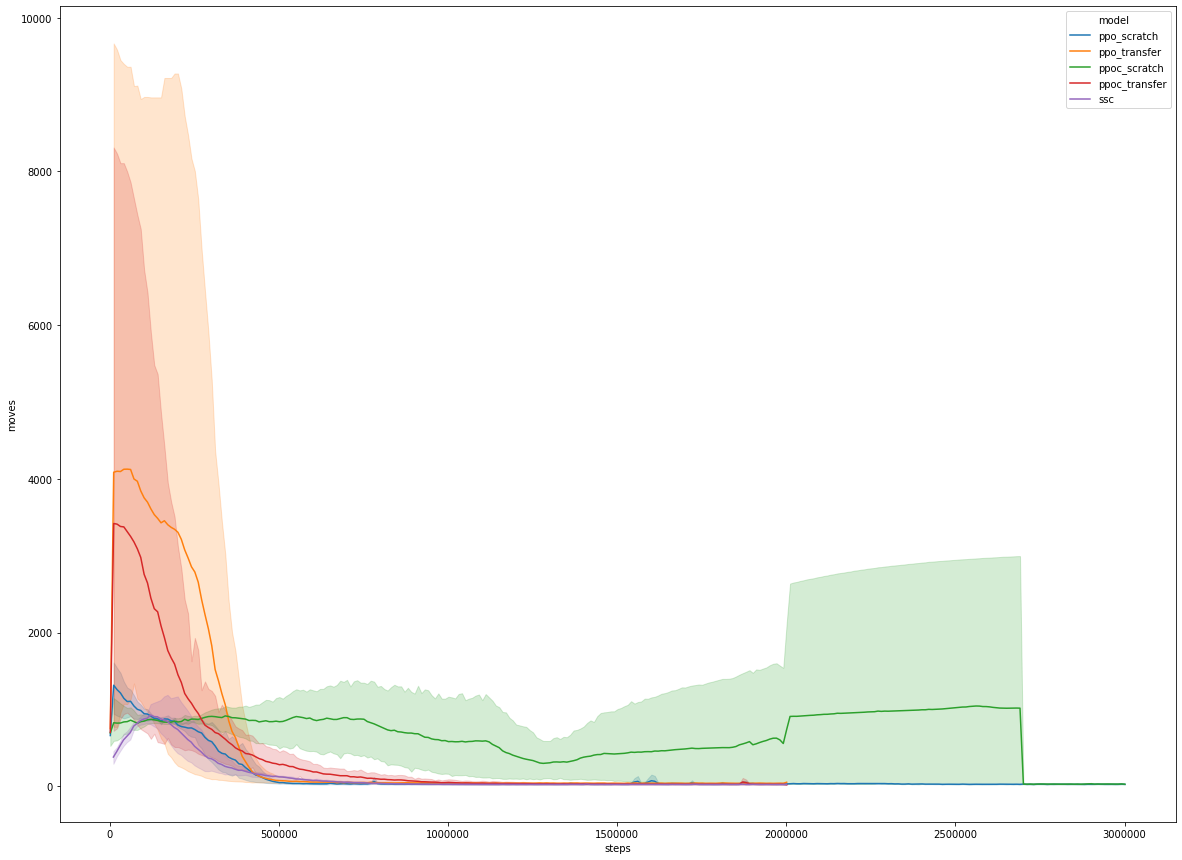

In [50]:
plt.figure(figsize=(20,15))
sns.lineplot(data=hanoi_df, x='steps', y='moves', hue='model')

/home/ec2-user/anaconda3/envs/deeprl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


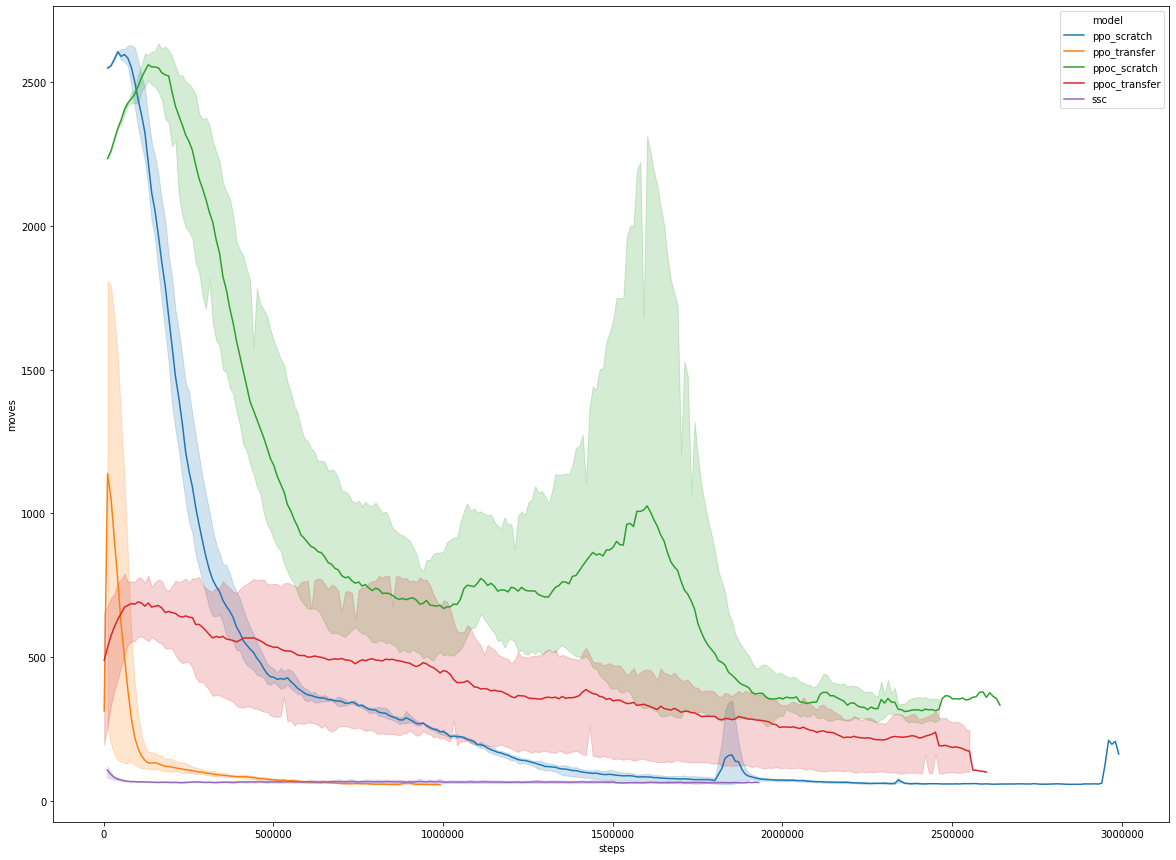

In [36]:
plt.figure(figsize=(20,15))
sns.lineplot(data=minigrid_df02, x='steps', y='moves', hue='model')

/home/ec2-user/anaconda3/envs/deeprl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


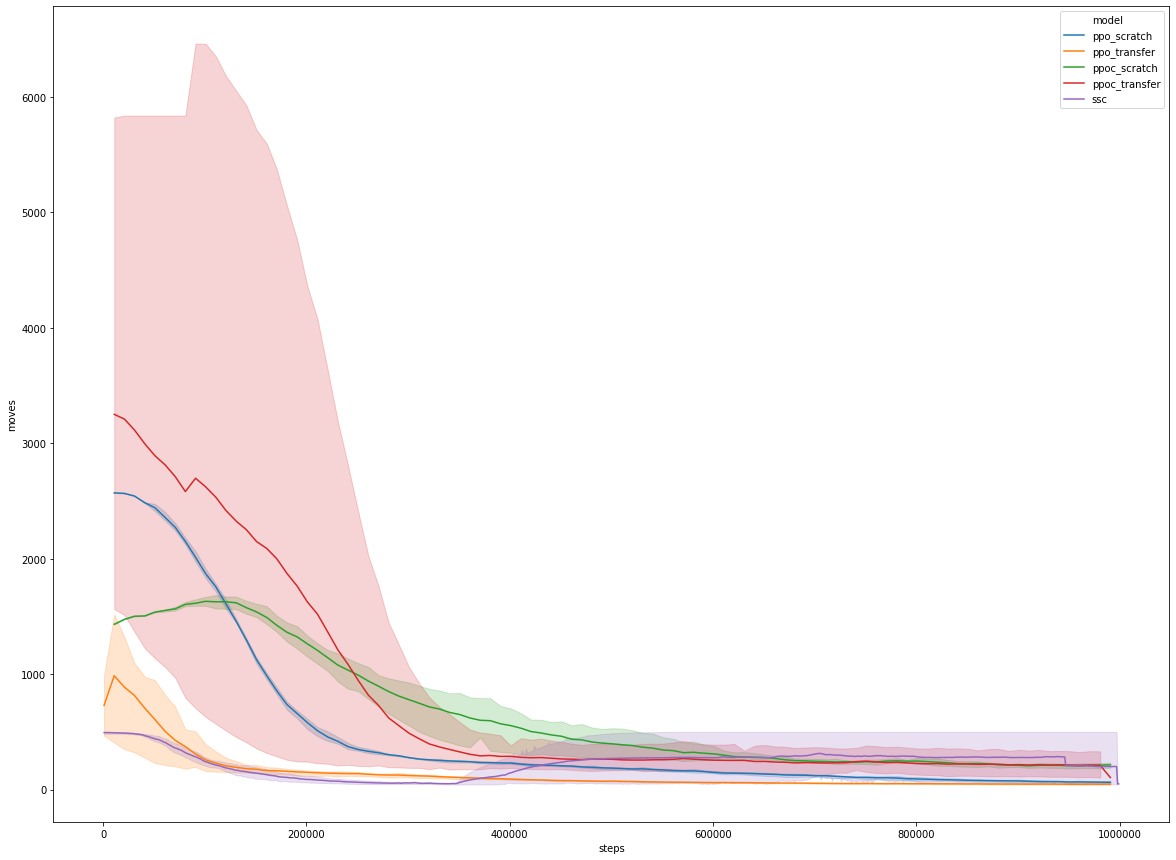

In [110]:
plt.figure(figsize=(20,15))
sns.lineplot(data=minigrid_df[minigrid_df.steps<1000000], x='steps', y='moves', hue='model')

In [ ]:
plt.figure(figsize=(20,15))
sns.lineplot(data=minigrid_df, x='steps', y='moves', hue='model')

/home/ec2-user/anaconda3/envs/deeprl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


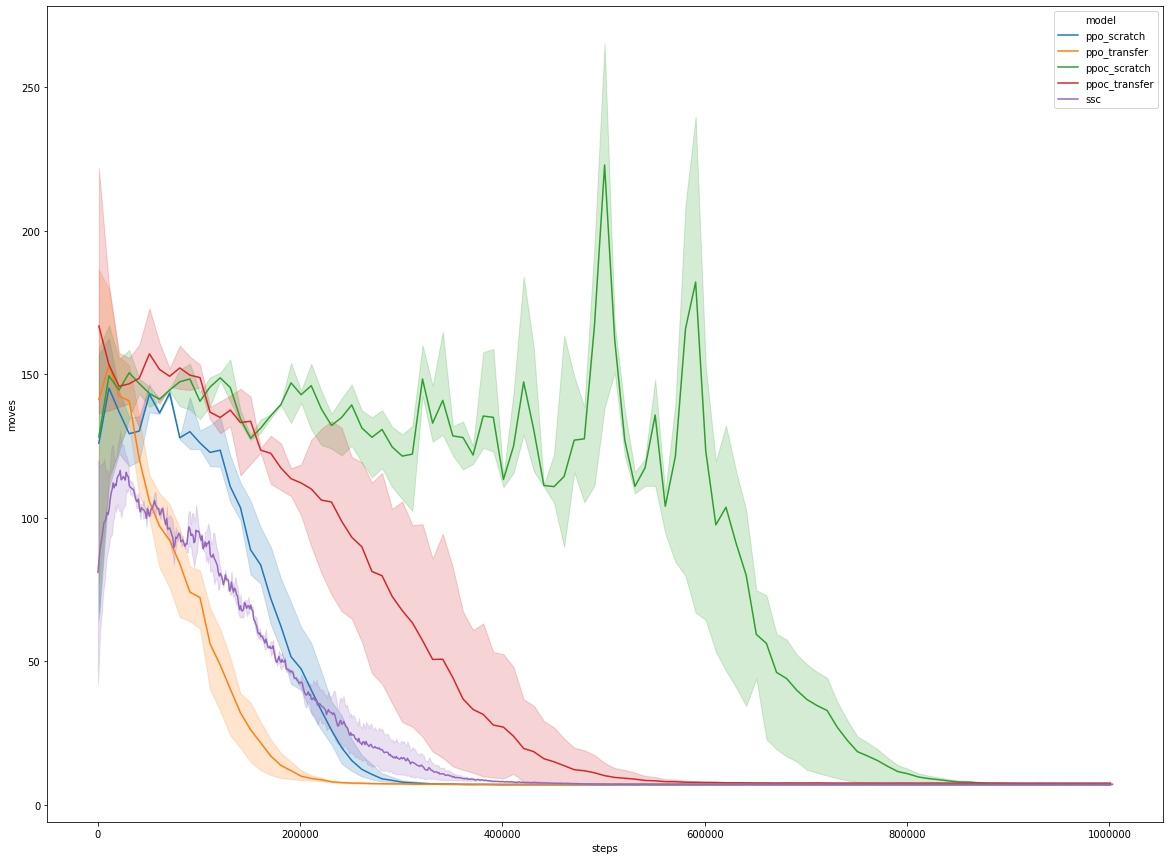

In [90]:
plt.figure(figsize=(20,15))
sns.lineplot(data=hanoi_df, x='steps', y='moves', hue='model')

/home/ec2-user/anaconda3/envs/deeprl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


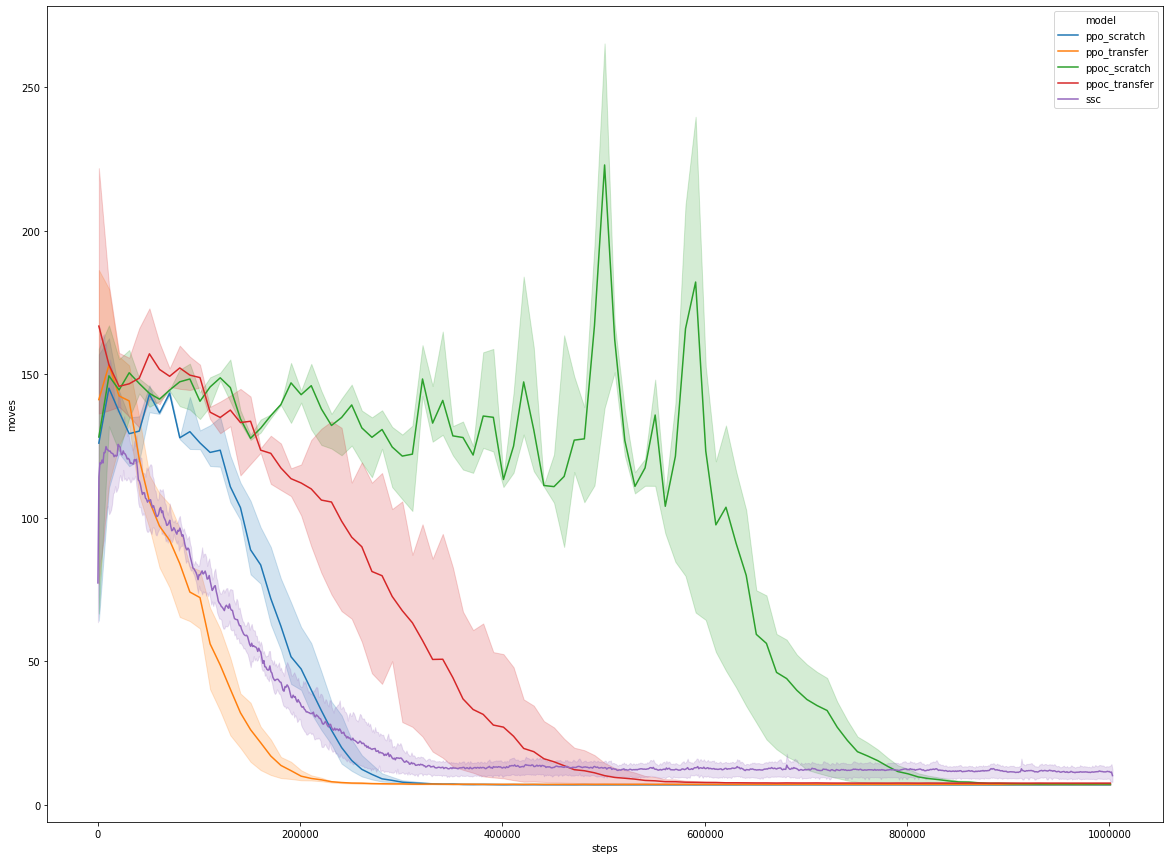

In [87]:
plt.figure(figsize=(20,15))
sns.lineplot(data=hanoi_df, x='steps', y='moves', hue='model')